## Example 1A :
Compute the (unilateral) Laplace Transform of thr function $F(s)$ = $e^{-t}$

In [1]:
import sympy #memanggil modul sympy

t, s = sympy.symbols('t,s')#memanggil variabel waktu dan frekuensi kompleks sebagai t dan s 
f = sympy.exp(-t) #memanggil fungsi domain waktu sebagai f
f #menampilkan fungsi domain waktu

exp(-t)

In [2]:
sympy.laplace_transform(f,t,s)#melakukan transformasi laplace

(1/(s + 1), 0, True)

## Example 1B :
Compute the inverse Laplace Transform of the function $F(s)$ = $\frac{1}{1+s}$

In [3]:
import sympy #memanggil modul sympy

t, s = sympy.symbols('t, s')#memanggil variabel waktu dan frekuensi kompleks sebagai t dan s 
F = 1/(1+s) #memanggil fungsi domain waktu sebagai F
F #Menampilkan fungsi domain waktu

1/(s + 1)

In [4]:
sympy.inverse_laplace_transform(F,s,t)#melakukan invers transformasi laplace

exp(-t)*Heaviside(t)

## Example 2 :
Compute the unilateral Laplace Transform of the function : $f(t) = -1.25 + 3.5te^{-2t} + 1.25e^{-2t}$

Verify the result by calculating the Inverse Laplace Transform of $F[f(t)]$

In [5]:
import sympy #memanggil modul sympy

t, s = sympy.symbols('t, s')#memanggil variabel waktu dan frekuensi kompleks sebagai t dan s 
f = -1.25 + 3.5*t*sympy.exp(-2**t) + 1.25*sympy.exp(-2**t) #memanggil fungsi domain waktu soal sebagai f
F = sympy.laplace_transform(f,t,s, noconds=True) #memanggil hasil transformasi laplace dari f sebagai F
F #menampilkan F

3.5*LaplaceTransform(t*exp(-2**t), t, s) + 1.25*LaplaceTransform(exp(-2**t), t, s) - 1.25/s

In [6]:
Fs = sympy.simplify(F)#menyederhanakan keluaran F
Fs

3.5*LaplaceTransform(t*exp(-2**t), t, s) + 1.25*LaplaceTransform(exp(-2**t), t, s) - 1.25/s

In [7]:
f2 = sympy.inverse_laplace_transform(F,s,t)#invers transformasi laplace F dipanggil sebagai f2
f2 #menampilkan f2

3.5*InverseLaplaceTransform(LaplaceTransform(t*exp(-2**t), t, s), s, t, _None) + 1.25*InverseLaplaceTransform(LaplaceTransform(exp(-2**t), t, s), s, t, _None) - 1.25*Heaviside(t)

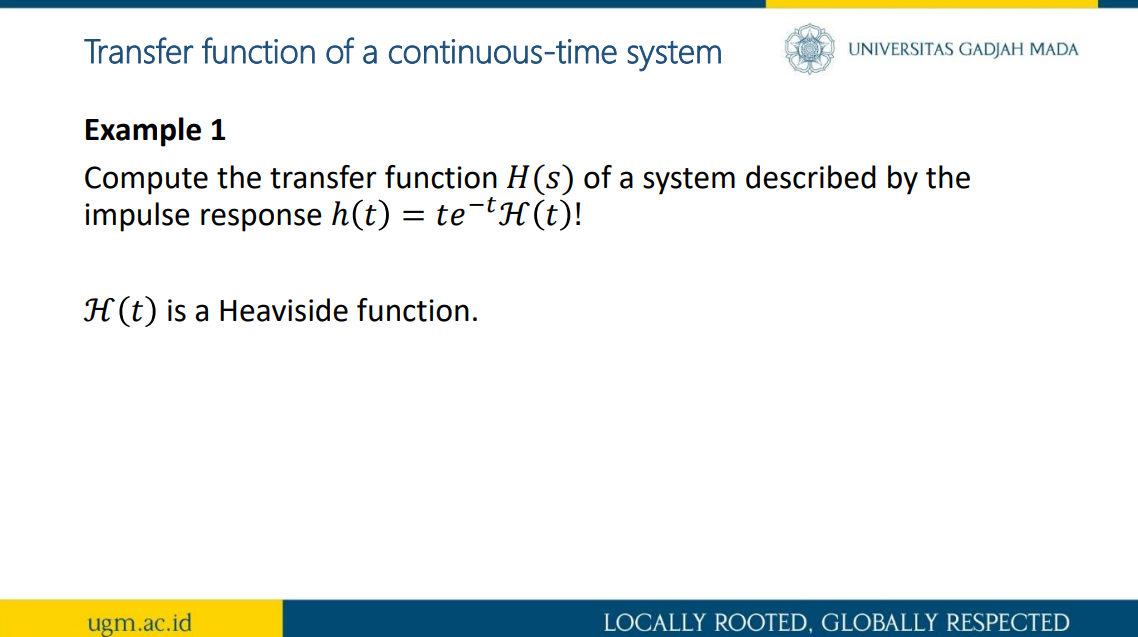

In [8]:
import sympy #memanggil modul sympy

t,s = sympy.symbols('t, s') #memanggil variabel waktu dan frekuensi kompleks sebagai t dan s
u   = sympy.Heaviside(t) #memanggil sinyal heaviside sebagai u
h   = t*sympy.exp(-t)*u #memanggil sinyal impuls respon sebagai h
H   = sympy.laplace_transform(h, t, s) #memanggil hasil transformasi laplace sebagai H
sympy.simplify(H) #menampilkan H tersederhanakan

((s + 1)**(-2), 0, True)

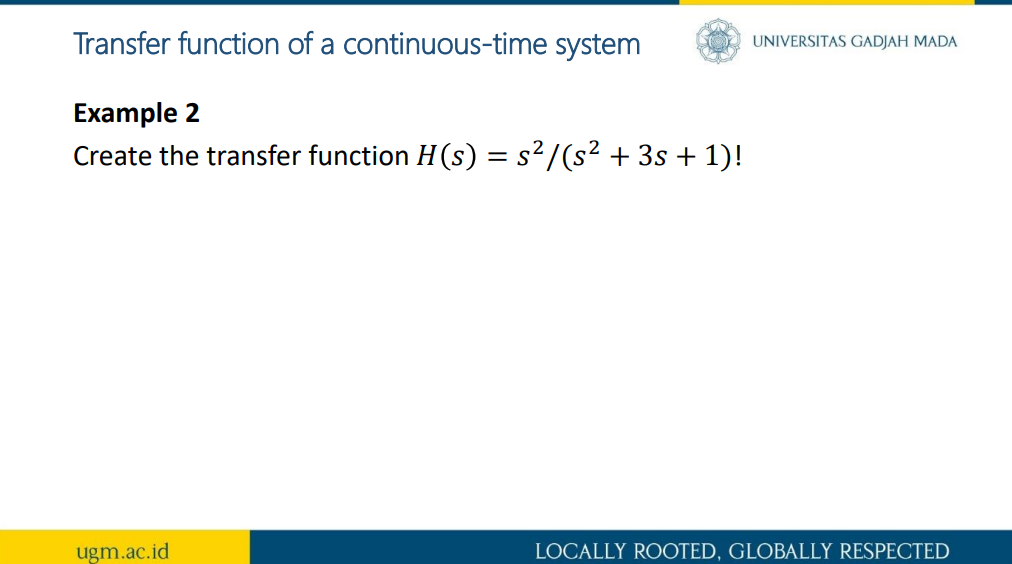

In [10]:
import sympy #memanggil modul sympy
import sympy.physics.control.lti as lti #memanggil modul sympy.physics.control.lti untuk membentuk fungsi transfer

s           = sympy.symbols('s') #memanggil variabel frekuensi kompleks sebagai s
numerator   = 1*s**2+0*s**1+0*s**0 #memanggil pembilang fungsi transfer sebagai numerator
denumerator = 1*s**2+3*s**1+1*s**0 #memanggil penyebut fungsi transfer sebagai denumerator

Hs          = lti.TransferFunction(numerator, denumerator, s) #memanggil fungsi transfer sebagai Hs
Hs #menampilkan fungsi transfer

TransferFunction(s**2, s**2 + 3*s + 1, s)

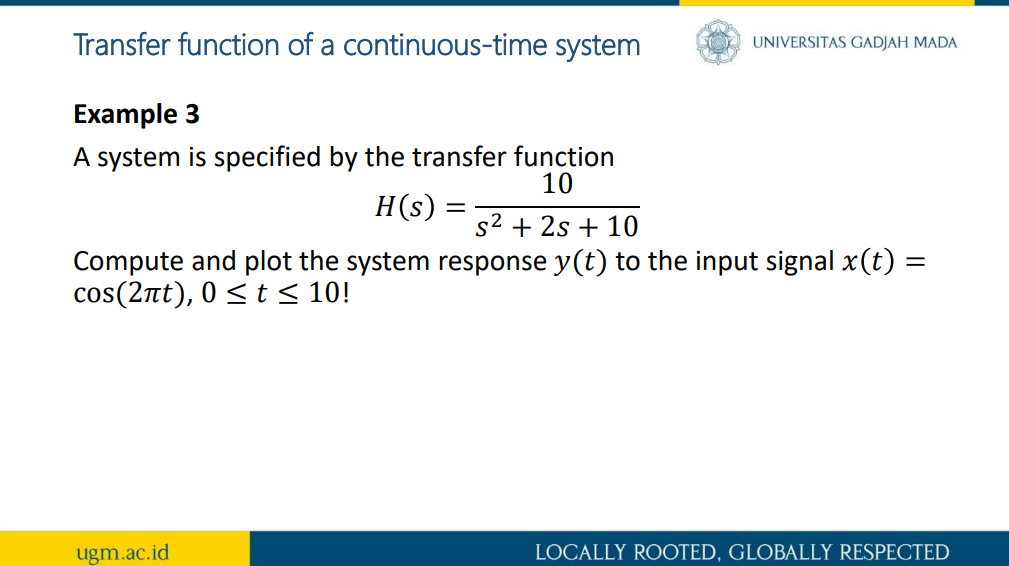

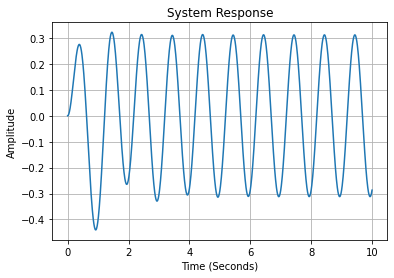

In [1]:
import sympy #memanggil modul sympy
import sympy.physics.control.lti as lti #memanggil modul sympy.physics.control.lti untuk membentuk fungsi transfer
import scipy.signal as signal #memanggil modul scipy.signal
from scipy.signal import lsim #memanggil lsim dari modul scipy.signal
import numpy as np #memanggil modul numpy
import pylab as plt #memanggil modul pylab

numerator = [10] #memanggil pembilang sebagai numerator
denumerator = [1, 2, 10] #memanggil penyebut sebagai denumerator
H = signal.TransferFunction(numerator, denumerator) #memanggil fungsi transfer sebagai H

dt = 0.01 #interval sampling 0.01 detik dipanggil sebagai dt
t = np.arange(0,10+dt,dt) #memanggil rentang waktu dari 0 sampai 10 sebagai t
x = np.cos(2*np.pi*t) #memanggil sinyal masukan sebagai x
y = lsim(H, x, t) #memanggil sistem respon sebagai y

#plot sistem respon
plt.plot(t, y[1]) #plot
plt.title("System Response") #judul
plt.xlabel("Time (Seconds)") #label sumbu x
plt.ylabel("Amplitude") #label sumbu y
plt.grid(True) #membuat grid pada plot
plt.show() #menampilkan plot

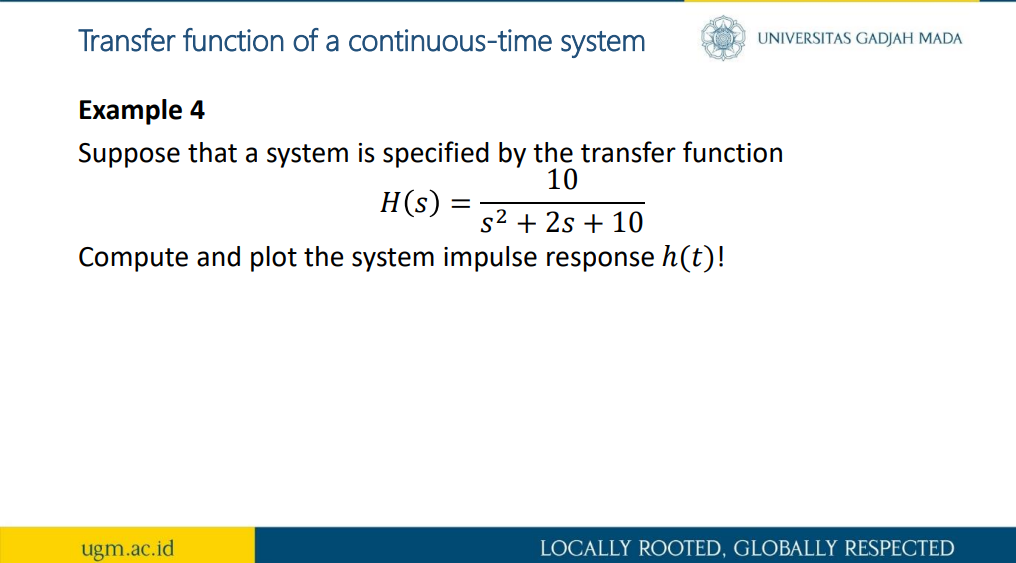

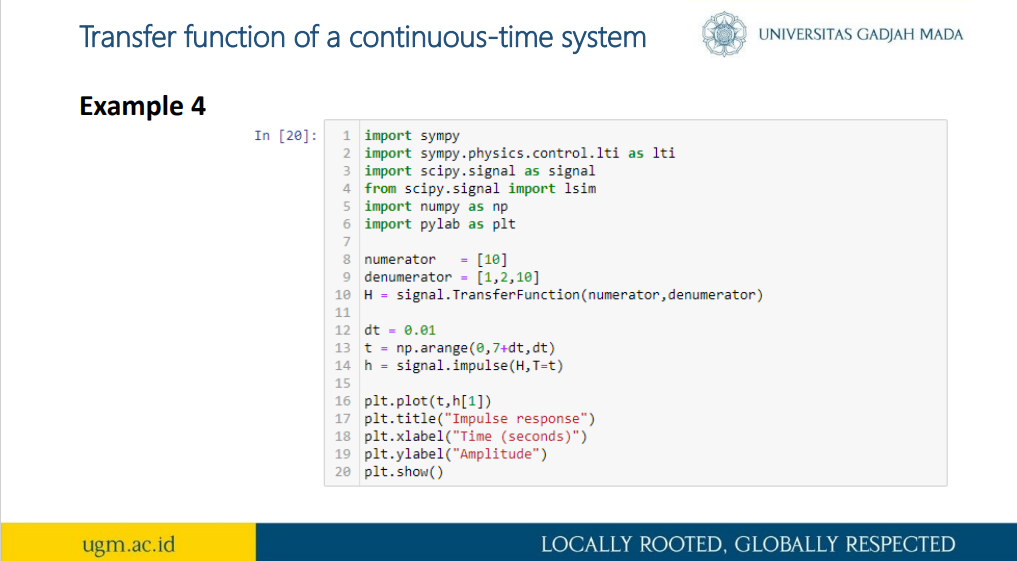

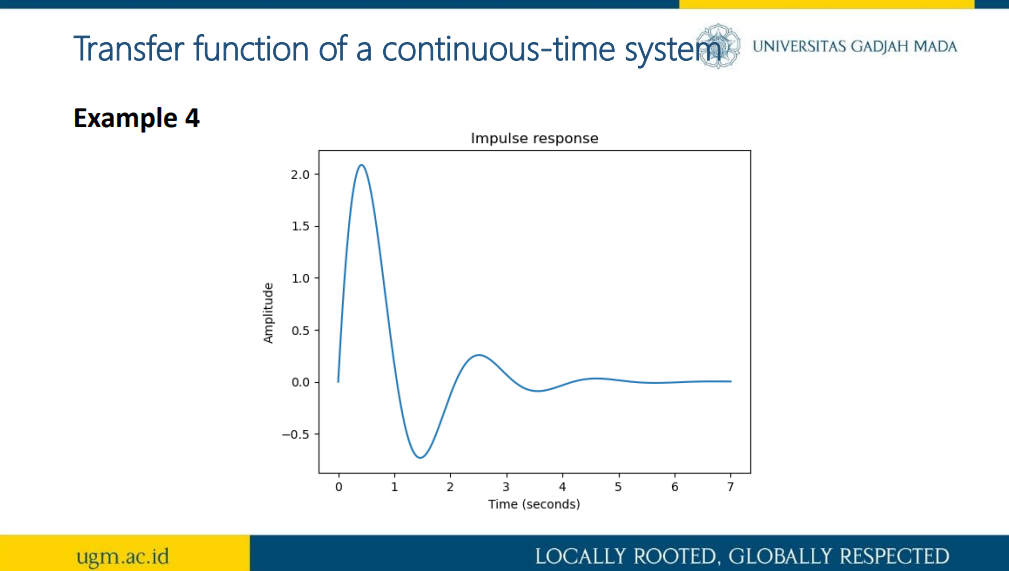

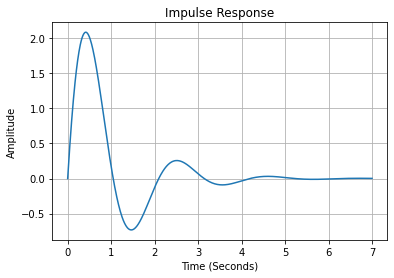

In [2]:
import sympy #memanggil modul sympy
import sympy.physics.control.lti as lti #memanggil modul sympy.physics.control.lti untuk membentuk fungsi transfer
import scipy.signal as signal #memanggil modul scipy.signal
from scipy.signal import lsim #memanggil lsim dari modul scipy.signal
import numpy as np #memanggil modul numpy
import pylab as plt #memanggil modul pylab

numerator = [10] #memanggil pembilang sebagai numerator
denumerator = [1, 2, 10] #memanggil penyebut sebagai denumerator
H = signal.TransferFunction(numerator, denumerator)#memanggil fungsi transfer sebagai H

dt = 0.01 #interval sampling 0.01 detik dipanggil sebagai dt
t = np.arange(0,7+dt,dt)#memanggil rentang waktu dari 0 sampai 10 sebagai t
h = signal.impulse(H, T=t)#memanggil impuls respon sebagai y

#plot sistem respon
plt.plot(t, h[1]) #plot
plt.title("Impulse Response")#judul
plt.xlabel("Time (Seconds)")#label sumbu x
plt.ylabel("Amplitude")#label sumbu y
plt.grid(True) #membuat grid pada plot
plt.show() #menampilkan plot